# Test NeuralNet class

In [2]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [10]:
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

#store the min and the max of each column to denormalize the data later
min_max = {}
for column in df.columns:
    min_max[column] = [df[column].abs().min(), df[column].abs().max()]

# normalize all the data of the dataframe between 0 and 1
df_scaled = df.copy()

#normalize the data between 0 and 1 using the min_max dictionary
for column in df_scaled.columns:
    df_scaled[column] = 0.1 + 0.8 * (df_scaled[column] - min_max[column][0])  / (min_max[column][1] - min_max[column][0])

y = df_scaled['SalePrice'].astype(int).values
X = df_scaled.drop('SalePrice', axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nn = NeuralNet(layers=[X_train.shape[1], 64, 32, 1], function='tanh')
nn.fit(X_train, y_train)

Capas de pesos 1 (Peso de la capa 1): (1, 1)
Capas de pesos 2 (Peso de la capa 2): (64, 36)
Capas de pesos 3 (Peso de la capa 3): (32, 64)
Capas de pesos 4 (Peso de la capa 4): (1, 32)
Epoch 0/1000 - Training Error: 0.005011 - Validation Error: 0.004953
Epoch 100/1000 - Training Error: 0.000094 - Validation Error: 0.000132
Epoch 200/1000 - Training Error: 0.000057 - Validation Error: 0.000077
Epoch 300/1000 - Training Error: 0.000032 - Validation Error: 0.000049
Epoch 400/1000 - Training Error: 0.000028 - Validation Error: 0.000040
Epoch 500/1000 - Training Error: 0.000021 - Validation Error: 0.000033
Epoch 600/1000 - Training Error: 0.000015 - Validation Error: 0.000025
Epoch 700/1000 - Training Error: 0.000013 - Validation Error: 0.000021
Epoch 800/1000 - Training Error: 0.000011 - Validation Error: 0.000018
Epoch 900/1000 - Training Error: 0.000010 - Validation Error: 0.000017


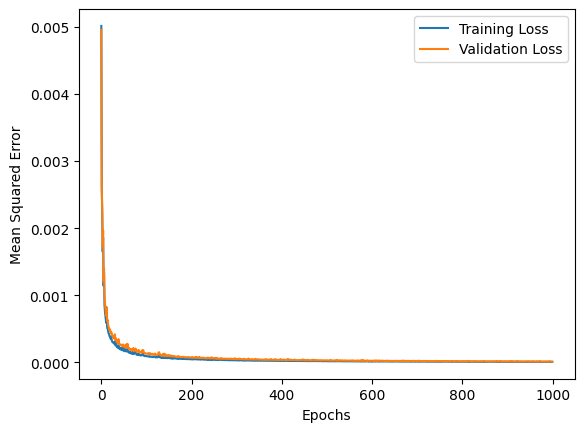

Predictions: [-1.13945290e-02  2.23940527e-04 -1.43287846e-03 -7.50864920e-04
 -4.24650929e-03 -3.96292015e-03 -1.61884076e-03  1.57562106e-03
 -2.48278169e-03  5.84365901e-03  1.48587926e-03 -1.85144903e-04
 -4.50085457e-03 -2.15682714e-03 -1.35698032e-03  3.59779714e-04
  6.46325796e-03  2.57559996e-03  4.93381977e-03  5.72636393e-04
 -1.83700539e-03  1.33481605e-03 -4.47617781e-03 -3.16238191e-03
  2.58024421e-04  1.73113467e-03  1.49195018e-03  3.44775346e-02
 -4.72048516e-03 -1.75323490e-03  5.16687147e-03 -9.93998448e-04
  6.62161997e-04  6.35667052e-03 -5.42737712e-04 -1.80201176e-03
  1.68838507e-03 -2.28202494e-03  2.91079701e-03 -3.61892221e-03
  1.73022123e-03 -8.89305090e-04  5.25262164e-03  2.55184443e-03
 -7.99654573e-03  6.30661752e-03  1.33422418e-03  9.97614799e-04
 -2.24966810e-03  1.55514443e-03 -5.26645543e-03  1.33966288e-02
 -1.56945397e-03  3.42202008e-03  4.65812475e-04  8.20811853e-04
  6.53772729e-03 -5.06587236e-04 -9.26842291e-04 -7.27440221e-04
  1.48724773

In [11]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
predictions = nn.predict(X_test)
print("Predictions:", predictions.flatten())

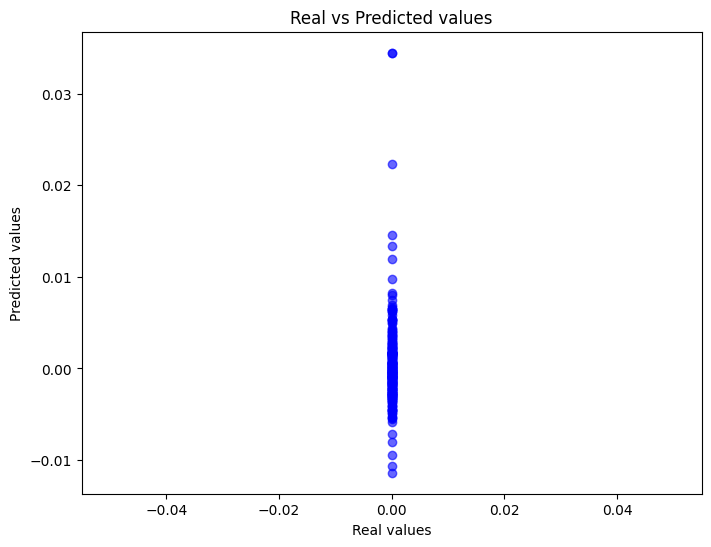

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()